# Análisis de Curvas de Luz y Exoplanetas

Unas de las áreas de mayor interés en la actualidad es la detección y estudio de exoplanetas. Esto se puede lograr a través del método de tránsito al analizar las curvas de luz de las estrellas. Es decir, la evolucón del brillo de los objetos celestes con el paso del tiempo con el fin de detectar variaciones (o en otras palabras: transientes).

Un tránsito se produce cuando el brilo de una estrella disminuye de manera drástica por un periodo de tiempo debido al paso de un cuerpo opaco (por ejemplo un planeta) frente a éste, bloquenado parte de su luz. Teniendo en cuenta el movimiento del objeto de menor tamaño, el resultado es una curva de luz en forma de "U", el cual puede darnos parámetros importantes.

![transit](https://miro.medium.com/v2/resize:fit:1370/format:webp/0*ICGs2x7IfAUwCpFG.png)

La herramienta que vamos a utilizar en este caso es "Lightkurve", paquetería encargada de descargar datos de sondeos de exoplanetas. Uno de ellos es el "Transiting Exoplanet Survey Satellite" (TESS).

Vamos a instalarlo inicialmente:

In [ ]:
!pip install lightkurve

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 15.1 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=dfa75be8112fa98b035ed919fd3b2ce4e1b55e94a9c246f31fbb85c74c6e4761
  Stored in directory: /root/.cache/pip/wheels/3c/ea/60/8d1c9fbbc99492a1775b36a5e29c8c1ef309cc5821bd5a219d
  Created wheel for memoization: filename=memoization-0.4.0-py3-none-any.whl size=50451 sha256=5acb68dfe12cee2e8ddc299b486933a51011a9705de434e863486f9e182d592f
  Stored in directory: /root/.cache/pip/wheels/3e/b8/c5/b553

In [ ]:
import lightkurve as lk #permite obtener datos de TESS para analizar curvas de luz
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Las estrellas observadas por TESS tienen un identificador único iniciando por TIC (TESS Imput Catalogue) y un número de al menos 8 o 9 cifras. Un poco incómodo la verdad, sin embargo, se pueden aceptar nombres propios ya otorgados. Eso lo veremos más adelante.

Por ejemplo, vamos a analizar el objeto TIC 284475976.

In [ ]:
star='TIC 284475976'
#lk.search_lightcurve(nombre de la estrella,mission='nombre de la misión',author=None)
data= lk.search_lightcurve(star,mission='TESS',author='SPOC')
data

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 23,2020,SPOC,120,284475976,0.0
1,TESS Sector 26,2020,SPOC,120,284475976,0.0
2,TESS Sector 40,2021,SPOC,120,284475976,0.0
3,TESS Sector 41,2021,SPOC,120,284475976,0.0
4,TESS Sector 56,2022,SPOC,20,284475976,0.0
5,TESS Sector 60,2022,SPOC,20,284475976,0.0
6,TESS Sector 55,2022,SPOC,120,284475976,0.0
7,TESS Sector 53,2022,SPOC,120,284475976,0.0
8,TESS Sector 56,2022,SPOC,120,284475976,0.0


Ahora, procederemos a descargarlos.

In [ ]:
#Visualizamos los datos para ver los productos disponibles para descargar
#guardar un sector en específico
data= lk.search_lightcurve(star,mission='TESS',author='SPOC',sector=23)
lc_star=data.download()

¿Que se ha descargado exáctamente? Se trata de una tabla de múltiples datos. Sin embargo, las más importantes son las que digan ``flux`` (que es el brillo de la estrella) y ``time``, que es el tiempo de la observación. Vamos a ver:

In [ ]:
lc_star

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
1928.103997459462,———,———,-1.1997692e-03,504468,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1928.1053863656775,———,———,-1.1997513e-03,504469,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1928.1067752717763,———,———,-1.1997335e-03,504470,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1928.1081641779915,———,———,-1.1997155e-03,504471,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1928.1095530842076,———,———,-1.1996976e-03,504472,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1928.1109419903078,———,———,-1.1996798e-03,504473,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1928.1123308965239,———,———,-1.1996619e-03,504474,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———
1928.113719802739,———,———,-1.1996439e-03,504475,———,———,———,———,———,———,———,———,10000,———,———,———,———,———,———,———,———,———,———


In [ ]:
#descargar una calumna en específico
lc_star.flux

<MaskedQuantity [      ———,       ———,       ———, ..., 5305.1226,
                 5295.2114, 5316.618 ] electron / s>

A gusto del usuario, vamos a guardar la tabla en nuestro computador usando la herramienta de pandas.

In [ ]:
tess_table=pd.DataFrame()

tess_table['Time']=lc_star.time.value
tess_table['Flux']=lc_star.flux.value

tess_table.to_csv('tess_data_tic.csv')


## Graficación de los datos.

¿Cómo podemos ver los datos que acabamos de descargar? Tenemos dos opciones, usar matplotlib a partir del DataFrame que acabamos de crear o usar directamente la herramienta de ``LightKurve`` que permite visiualizar rápidamente.

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

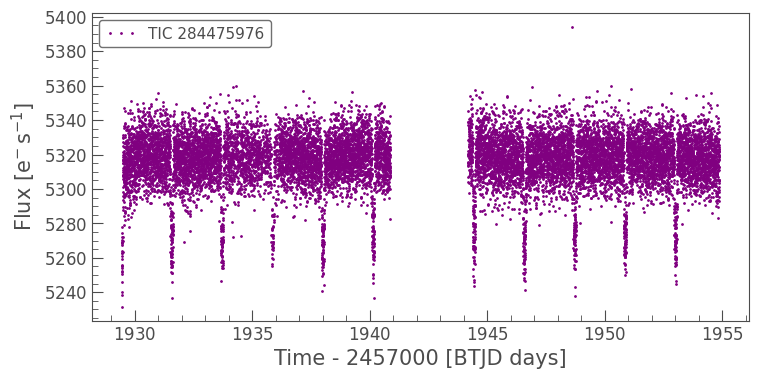

In [ ]:
lc_star.plot(color='purple',marker='.',lw=0)

## ¡Sin embargo!

Hay que tener cuidado, porque no todas las estrellas de TESS contienen exoplanetas. Existen otras características que pueden confundir. Veamos otro ejemplo:

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

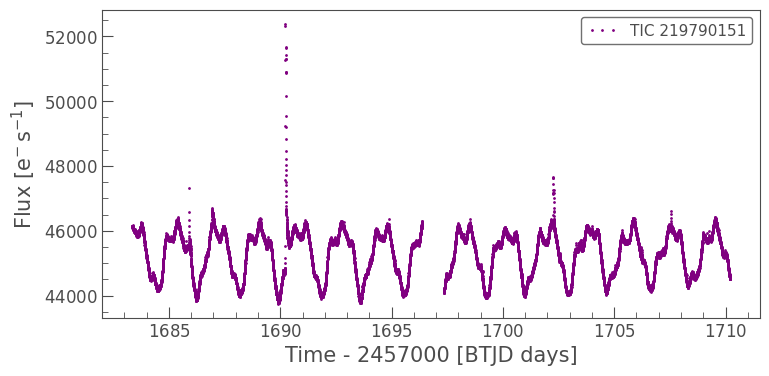

In [ ]:
star2='TIC 219790151'
data2= lk.search_lightcurve(star2,mission='TESS',author='SPOC')[0]
lc_star2=data2.download()

lc_star2.plot(color='purple',marker='.',lw=0)


## *Este tipo de curva evidencia que es una estrella variable*

Esto implica que la estrella puede que tenga manchas de tamaño considerable o que sea una estrella que tenga pulsos.

La subida muy alta que tiene hacia 1960 es una fulburación estelar.

En este caso la estrella no es apta para usar el metodo de tránsitos para determinar la existencia de exoplanetas.

## ¿Qué está pasando?
### La respuesta: manchas estelares.

En el caso de esta estrella es debido a que posee manchas estelares

![starspots](https://media.springernature.com/full/springer-static/image/art%3A10.12942%2Flrsp-2005-8/MediaObjects/41116_2015_9184_Fig2.jpg?as=webp)

# Analicemos la curva de luz:

Vamos a observar lo que podemos analizar de nuestra curva de luz. Tomemos como ejemplo un caso de estudio según el NASA Exoplanet Archive: https://exoplanetarchive.ipac.caltech.edu/

In [ ]:
star3='TIC 165227846'
data3= lk.search_lightcurve(star3, author='TESS-SPOC', sector=37)
lc_star3=data3.download()
data3

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 37,2021,TESS-SPOC,600,165227846,0.0


<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

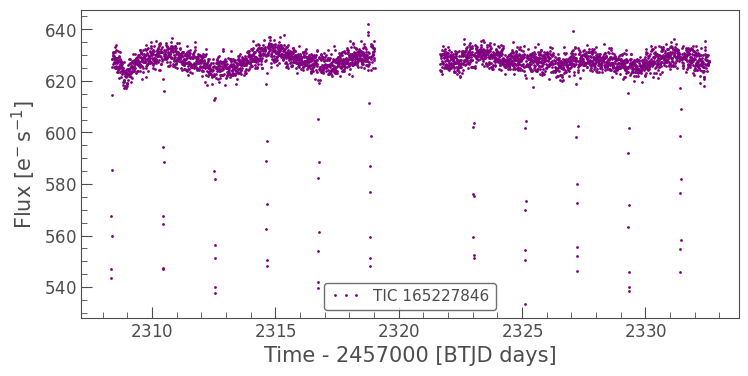

In [ ]:
lc_star3.plot(color='purple',marker='.',lw=0)

### *Variabilidad dada por manchas más tránsitos*

Se evidencia que la curva tiene un comportamiento ondulatorio y también presenta mínimos por el tránsito del exoplaneta. Para que esta curva sea funcional, se debe corregir y eliminar la variabilidad dada por las manchas.

Para hacer esta corrección es necesario normalizar la curva de luz.

In [ ]:
#flatten dibuja una línea de tendencia ignorando los tránsitos
#la primera variable que genera es la curva aplanada y la segunda variable guarda la línea de tendencia
#window length es la cantidad de puntos que se vana tener en cuenta
lc_flat,lc_trend=lc_star3.flatten(window_length=101, return_trend=True)

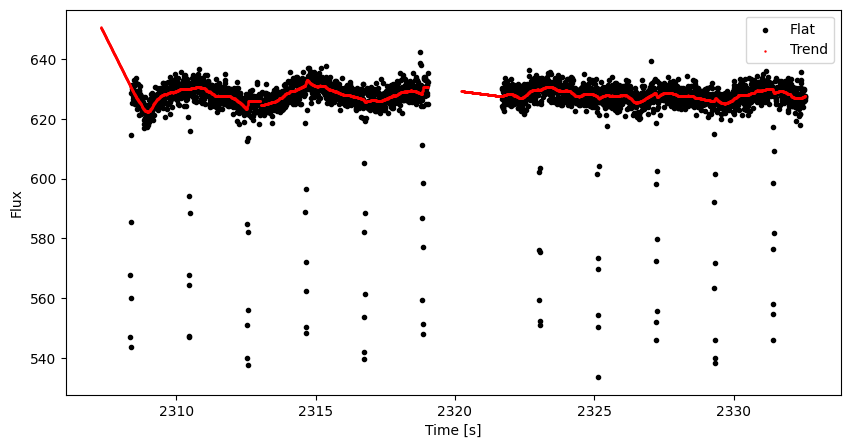

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(lc_flat.time.value,lc_star3.flux.value,color='black',marker='.',label='Flat')
plt.scatter(lc_trend.time.value,lc_trend.flux.value,color='red',s=0.5,label='Trend')
plt.xlabel('Time [s]')
plt.ylabel('Flux')
plt.legend()

Vamos a ver cómo quedó la curva de luz normalizada y corregida:

(2310.0, 2311.0)

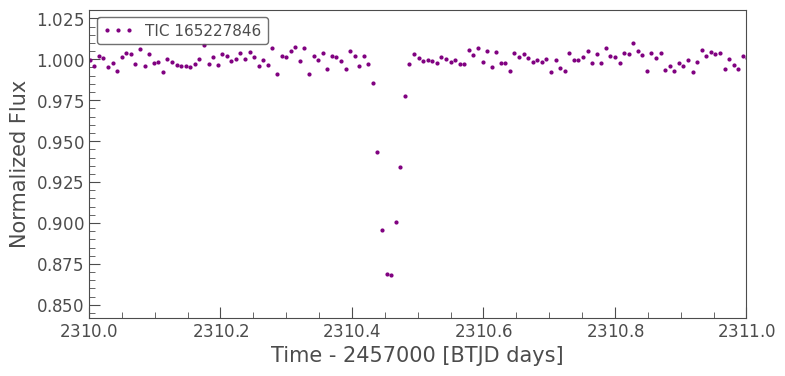

In [ ]:
lc_flat.plot(color='purple',marker='o',lw=0)
plt.xlim(2310, 2311)

Vamos a calcular el periodo de la curva de luz:

(0.0, 1.25)

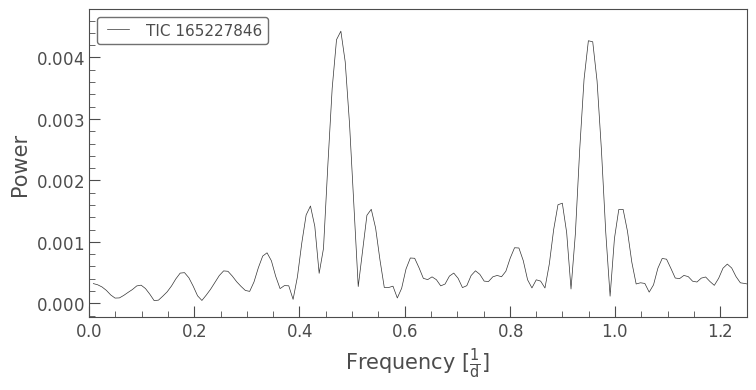

In [ ]:
lc_pg=lc_flat.to_periodogram(method='lombscargle') #FFT
lc_pg.plot()
plt.xlim(0,1.25)

(-0.5, 0.5)

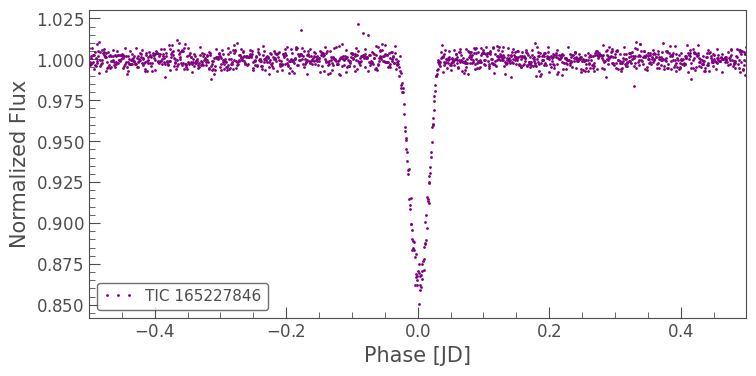

In [ ]:
period = 2.0966 #días
t0 = 2310.455 #días

lc_phase=lc_flat.fold(period=period,epoch_time=t0,wrap_phase=period/2)
lc_phase.plot(color='purple',lw=0,marker='.')
plt.xlim(-0.5,0.5)

## Estimación de parámetros del objeto transitante

Con la información observacional, se pueden realizar algunas estimaciones importantes sobre las características del objeto que está transitando sobre la estrella:

* Radio del planeta: $R_p = R_*\sqrt{\Delta F}$
* Distancia Planeta-Estrella: $a=\frac{2P R_*}{\pi}\frac{\Delta F^{1/4}}{\sqrt{t_T^2-t_F^2}}$
* La masa total: $(M_* + M_p)=\frac{4\pi^2a^3}{GP^2}$

¿Qué les parece si hacemos algunas estimaciones? ;)

In [23]:
import astropy.units as u

R_s = 0.35*u.Rsun

Rp = R_s*np.sqrt(1-0.865)
print(Rp.to(u.Rjup).round(2))

#Calcular los demás

1.25 jupiterRad


## Pregunta... pregunta...

Si asumimos que la masa de la estrella es mucho mayor que la del planeta. ¿Cuál sería la densidad de la estrella?